# Imports

In [85]:
import pandas as pd
import json
import ast
import requests
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import networkx as nx
import matplotlib.pyplot as plt


# Preshape the dataframes

### Merge all transaction dataframes

In [33]:

"""
df = pd.read_csv('/Users/charlesgarnot/Downloads/blop0.csv')
file_path = '/Users/charlesgarnot/Downloads/'

for i in range(1,40):
    file_name = 'blop'+str(i)+'.csv'
    df2 = pd.read_csv(file_path + file_name)
    df = df.append(df2, ignore_index=True)

df.drop(columns='Unnamed: 0', inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

file_path = '/Users/charlesgarnot/Documents/GitHub/XRPLords/Notebooks/Charles/'
file_name = 'transactions from 2020-01-10 to 2020-01-20.csv'
df.to_csv(file_path + file_name, index=False)

df
"""


,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,AmountDEX,TransferRate,currency,issuer,value
0,2020-01-10 00:00:00+00:00,rHnPuJWVBtRP1F5Z6Zzb8gYWVZrg1NbeAC,rsqPqyvJqVeqwZtXfBoqxnddDL4vWkHz3i,6038,304402204509E11298410955B1D93DA076E53E22149B33...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.137133
1,2020-01-10 00:00:00+00:00,rfpNMACVYdpf6znrhJcrH3CJFu3tvwf7Vx,r9JcwCSpRtEd22aNKGwsEKEWBHWq44bnb7,6038,3045022100BE045DC7A98587E86A170A75519FB45BD394...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.040634
2,2020-01-10 00:00:00+00:00,r3f1Az73MKCYMQYxyPiQ2zmAEbNFXaMzSY,rsKmxd181tdWkM7ADvYgza15GEbDSFdnTh,6038,30440220352411F7E4B872D4D812FFE8991BA1C7F31800...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.016375
3,2020-01-10 00:00:00+00:00,rayoZ9jCiH3JjWocjgy9yHmG9W3cKYsfcu,rPDXsQ2qnx5Pup58Fpr5tmdRYvquH6vXys,6038,3045022100B6E629E83909304552403662162D469F5C08...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.132582
4,2020-01-10 00:00:00+00:00,rBiBqvTkfKBwbVHacSQR4eTzkgtCNuPTpy,rJ9FEjpnWDKBuA245kvFL4guU3YqoGEQjS,6038,3045022100E602B05F9B3A02D9F766AF27D39CC7BC5DBD...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.137229
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392108,2020-01-19 23:59:12+00:00,rKuAAajywBVRqWubSG43f3YUQTckH6SWrp,rGvFAsDiR8jpNsxv7JoydBbKYZMxYEdSno,12,304402201A711D1E123A5A865C04865DE429D6765DF7A3...,NaN,52854004,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,464.774019
392109,2020-01-19 23:59:12+00:00,rKuAAajywBVRqWubSG43f3YUQTckH6SWrp,rLhw4b5C1FYPcz6LSHF4b8PWBZwwyJ7Asd,12,304402204C7BC46A38BA4B181EF4C42405E53E237F2360...,NaN,52854004,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,492.155591
392110,2020-01-19 23:59:12+00:00,rKuAAajywBVRqWubSG43f3YUQTckH6SWrp,rKWeJfhstn5AbRQfc65Goc6csDUadXTM3U,12,3045022100A1C5042D5285EE933E02C1528E57D7622F1A...,NaN,52854004,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,179.764316
392111,2020-01-19 23:59:12+00:00,r3VC6jvrr3ny2fAPyGP3EjgKh9o4UrnpHE,rKuAAajywBVRqWubSG43f3YUQTckH6SWrp,12,304402202E217BF61986A49B0A38699413F7D5CDEE6AFF...,NaN,52854004,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,416.043281


### Download gateways dataframe

In [34]:
"""

def Get_Gateways():

    url= 'https://data.ripple.com/v2/gateways'
    r = requests.get(url)

    content = json.loads(r.content.decode('utf-8'))
    df2_created = False
    for key in content.keys():
        if df2_created:
            df3 = pd.DataFrame(content[key])
            df3['currency'] = key
            df2 = pd.concat([df2, df3], ignore_index=True, sort=False)

        if not df2_created:
            df2 = pd.DataFrame(content[key])
            df2['currency'] = key
            df2_created = True

    return df2

df_gateways = Get_Gateways()

################################################################################

known_accounts = list(set(df_gateways.account))
account_holders = []

for account in known_accounts:
    holder = df_gateways.loc[df_gateways['account'] == account, 'name'].iloc[0]
    account_holders.append(holder)  

data = np.array([account_holders, known_accounts]).transpose()
columns = ['name', 'account']
df_gateways = pd.DataFrame(data, columns=columns)

file_name = 'gateways.csv'
df_gateways.to_csv(file_path + file_name, index=False)

"""


# Import dataframes

### df is the dataframe for non XRP transactions from 2020-01-10 to 2020-01-20

In [45]:
df = pd.read_csv('/Users/charlesgarnot/Documents/GitHub/XRPLords/Notebooks/Charles/transactions from 2020-01-10 to 2020-01-20.csv')
df

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,AmountDEX,TransferRate,currency,issuer,value
0,2020-01-10 00:00:00+00:00,rHnPuJWVBtRP1F5Z6Zzb8gYWVZrg1NbeAC,rsqPqyvJqVeqwZtXfBoqxnddDL4vWkHz3i,6038,304402204509E11298410955B1D93DA076E53E22149B33...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.137133
1,2020-01-10 00:00:00+00:00,rfpNMACVYdpf6znrhJcrH3CJFu3tvwf7Vx,r9JcwCSpRtEd22aNKGwsEKEWBHWq44bnb7,6038,3045022100BE045DC7A98587E86A170A75519FB45BD394...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.040634
2,2020-01-10 00:00:00+00:00,r3f1Az73MKCYMQYxyPiQ2zmAEbNFXaMzSY,rsKmxd181tdWkM7ADvYgza15GEbDSFdnTh,6038,30440220352411F7E4B872D4D812FFE8991BA1C7F31800...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.016375
3,2020-01-10 00:00:00+00:00,rayoZ9jCiH3JjWocjgy9yHmG9W3cKYsfcu,rPDXsQ2qnx5Pup58Fpr5tmdRYvquH6vXys,6038,3045022100B6E629E83909304552403662162D469F5C08...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.132582
4,2020-01-10 00:00:00+00:00,rBiBqvTkfKBwbVHacSQR4eTzkgtCNuPTpy,rJ9FEjpnWDKBuA245kvFL4guU3YqoGEQjS,6038,3045022100E602B05F9B3A02D9F766AF27D39CC7BC5DBD...,NaN,52630771,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,0.137229
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392108,2020-01-19 23:59:12+00:00,rKuAAajywBVRqWubSG43f3YUQTckH6SWrp,rGvFAsDiR8jpNsxv7JoydBbKYZMxYEdSno,12,304402201A711D1E123A5A865C04865DE429D6765DF7A3...,NaN,52854004,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,464.774019
392109,2020-01-19 23:59:12+00:00,rKuAAajywBVRqWubSG43f3YUQTckH6SWrp,rLhw4b5C1FYPcz6LSHF4b8PWBZwwyJ7Asd,12,304402204C7BC46A38BA4B181EF4C42405E53E237F2360...,NaN,52854004,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,492.155591
392110,2020-01-19 23:59:12+00:00,rKuAAajywBVRqWubSG43f3YUQTckH6SWrp,rKWeJfhstn5AbRQfc65Goc6csDUadXTM3U,12,3045022100A1C5042D5285EE933E02C1528E57D7622F1A...,NaN,52854004,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,179.764316
392111,2020-01-19 23:59:12+00:00,r3VC6jvrr3ny2fAPyGP3EjgKh9o4UrnpHE,rKuAAajywBVRqWubSG43f3YUQTckH6SWrp,12,304402202E217BF61986A49B0A38699413F7D5CDEE6AFF...,NaN,52854004,Payment,"{'currency': 'BTC', 'issuer': 'rpJZ5Wyotdphojw...",NaN,BTC,rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,416.043281


### df_gateways is the dataframe for all gateways and their account

In [37]:
df_gateways = pd.read_csv('/Users/charlesgarnot/Documents/GitHub/XRPLords/Notebooks/Charles/gateways.csv')
df_gateways

,name,account
0,Gatehub Fifth,rcA8X3TVMST1n3CJeAdGk1RdRCHii7N2h
1,Ripple Fox,rKiCet8SdvWxPXnAgYarFUXMh1zCPz432Y
2,Bitso,rG6FZ31hDHN1K5Dkbma3PSB5uVCuVVRzfn
3,The Rock Trading,rLEsXccBGNR3UPuPu2hUXPjziKC3qKSBun
4,Payroutes,rNPRNzBB92BVpAhhZr4iXDTveCgV5Pofm9
5,RippleChina,razqQKzJRdB4UxFPWf5NEpEG3WMkmwgcXA
6,Coinex,rsP3mgGb2tcYUrxiLFiHJiQXhsziegtwBc
7,Ripple Singapore,r9Dr5xwkeLegBeXq6ujinjSBLQzQ1zQGjH
8,GBI,rrh7rf1gV2pXAoqA8oYbpHd8TKv5ZQeo67
9,Gatehub,rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq


# Trying to make some plots

In [76]:
crypto='USD'

fig = go.Figure(data=[
    go.Bar(name='known issuer', x=[crypto], y=[df.loc[(df['currency'] == crypto) & (df['issuer'].isin(known_accounts)), 'value'].sum()]),
    go.Bar(name='unknown issuer', x=[crypto], y=[df.loc[(df['currency'] == crypto) & (~df['issuer'].isin(known_accounts)), 'value'].sum()])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [73]:
cryptos = np.array([['USD', 'CNY', 'EUR', 'AUD'],
                    ['BTC', 'ETH', 'BCH', 'LTC']])

nrows = cryptos.shape[0]
ncols = cryptos.shape[1]

fig = make_subplots(rows=nrows, cols=ncols)

for i in range(nrows):
    for j in range(ncols):
        crypto = cryptos[i,j]
        fig = go.Figure(data=[
            go.Bar(name='known issuer', x=[crypto], y=[df.loc[(df['currency'] == crypto) & (df['issuer'].isin(df_gateways['account'])), 'value'].sum()]),
            go.Bar(name='unknown issuer', x=[crypto], y=[df.loc[(df['currency'] == crypto) & (~df['issuer'].isin(df_gateways['account'])), 'value'].sum()])
            ])
        fig.update_layout(barmode='stack')
        fig.show()
            

In [74]:
cryptos = np.array([['USD', 'CNY', 'EUR', 'AUD'],
                    ['BTC', 'ETH', 'BCH', 'LTC']])

nrows = cryptos.shape[0]
ncols = cryptos.shape[1]

fig = make_subplots(rows=nrows, cols=ncols)

for i in range(nrows):
    for j in range(ncols):
        crypto = cryptos[i,j]
        fig.add_trace(go.Bar(name='known issuer',
                             legendgroup="group",
                             x=[crypto], 
                             y=[df.loc[(df['currency'] == crypto) & (df['issuer'].isin(df_gateways['account'])), 'value'].sum()]),
                      row = i+1, 
                      col = j+1) 
            
        fig.add_trace(go.Bar(name='unknown issuer', 
                             legendgroup="group2",
                             x=[crypto], 
                             y=[df.loc[(df['currency'] == crypto) & (~df['issuer'].isin(df_gateways['account'])), 'value'].sum()]),
                      row = i+1, 
                      col = j+1) 
            
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

# Network graph

In [87]:
df3 = df.loc[df['currency'] == 'BTC',['Account', 'Destination', 'value']].groupby(['Account', 'Destination']).count().reset_index(level=[0,1])
df3

,Account,Destination,value
0,r16E4uTTBuchu3dVfT6cwq2KmMPSECn17,rPLHV3wHNYfgJt2t8E7KQN76c425FAxeUH,40
1,r1uqdFC1e4DabhTU4Z7YKs7JuMsKNDfjq,rPKEEbEJD2n1NfFn1SJ9mv7yvasvbrJGzY,67
2,r21JNDGmCCL2UzRBqjiaws2hurqWTS8mB,rGUErWdJasXUG4pUD1uwYbgYWReWCZCgeT,33
3,r2LRyPHuRCnZ7u8VXYAkWZJYtYyUJFQnn,r4PUveqWMN88xSnrCPxZuK6VrWpmXaw44i,21
4,r2omSdmTDiHgiCTjd9VQk8BT1KuadoAqi,rMiCwMp6Z7oT6xuSEraDVRGbExs1c6zF6Q,27
...,...,...,...
5950,rytqkSFt7zyDiauA9rrnfEHsCGUtmB2hN,rHiPieXbNGrrpGXjFWygbsjfxFRYU58nPr,21
5951,rywn9nBEwt3HneU47XwQgLFk3pTQbu467,r4tzyosopXNvAvEA5itxy8mkvXN5SN7TMu,28
5952,ryz7cmCmwomdiCGSraeRHaxWjmHmfa5Kh,rEu9cWnsfrb76y1trRX5ioHRXyZLwhL3sT,36
5953,rzHsC9E21CuhF6DrhSDa66JWWb8PxVL55,rUr32hMfJsvsaNzK296dVLYXyzY4fZFMWE,31


In [88]:
G = nx.DiGraph()
edges_list = list(zip(df3.Account,df3.Destination,df3.value))
G.add_weighted_edges_from(edges_list)

G.edges(data=True)

OutEdgeDataView([('r16E4uTTBuchu3dVfT6cwq2KmMPSECn17', 'rPLHV3wHNYfgJt2t8E7KQN76c425FAxeUH', {'weight': 40}), ('rPLHV3wHNYfgJt2t8E7KQN76c425FAxeUH', 'r16E4uTTBuchu3dVfT6cwq2KmMPSECn17', {'weight': 31}), ('r1uqdFC1e4DabhTU4Z7YKs7JuMsKNDfjq', 'rPKEEbEJD2n1NfFn1SJ9mv7yvasvbrJGzY', {'weight': 67}), ('rPKEEbEJD2n1NfFn1SJ9mv7yvasvbrJGzY', 'r1uqdFC1e4DabhTU4Z7YKs7JuMsKNDfjq', {'weight': 42}), ('r21JNDGmCCL2UzRBqjiaws2hurqWTS8mB', 'rGUErWdJasXUG4pUD1uwYbgYWReWCZCgeT', {'weight': 33}), ('rGUErWdJasXUG4pUD1uwYbgYWReWCZCgeT', 'r21JNDGmCCL2UzRBqjiaws2hurqWTS8mB', {'weight': 17}), ('r2LRyPHuRCnZ7u8VXYAkWZJYtYyUJFQnn', 'r4PUveqWMN88xSnrCPxZuK6VrWpmXaw44i', {'weight': 21}), ('r4PUveqWMN88xSnrCPxZuK6VrWpmXaw44i', 'r2LRyPHuRCnZ7u8VXYAkWZJYtYyUJFQnn', {'weight': 36}), ('r2omSdmTDiHgiCTjd9VQk8BT1KuadoAqi', 'rMiCwMp6Z7oT6xuSEraDVRGbExs1c6zF6Q', {'weight': 27}), ('rMiCwMp6Z7oT6xuSEraDVRGbExs1c6zF6Q', 'r2omSdmTDiHgiCTjd9VQk8BT1KuadoAqi', {'weight': 37}), ('r2rJm66aq5rTe2rpsiBYngejBpyEkBVcc', 'rppGBbu7LNfcot

In [ ]:
nx.draw(G, pos=nx.spring_layout(G))

/Users/charlesgarnot/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



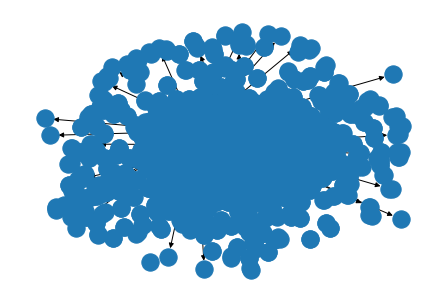

In [89]:
nx.draw(G)